In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
pip install statsmodels --upgrade

In [216]:
!pip install statsmodels

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import statsmodels as sm

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [218]:
data = pd.read_csv('/content/drive/MyDrive/Airpassenger/perrin-freres-monthly-champagne.csv',parse_dates = True)

In [219]:
df = data.copy()

In [220]:
data.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [221]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [222]:
#Five point summary
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [223]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [224]:
data.shape

(105, 2)

In [225]:
data.columns

Index(['Month', 'Sales'], dtype='object')

In [226]:
#Converting month to datetime format
data.Month=pd.to_datetime(data.Month)

In [227]:
#coverting the column month to index
data.set_index('Month', inplace = True)


Text(0, 0.5, 'Champagne Sales')

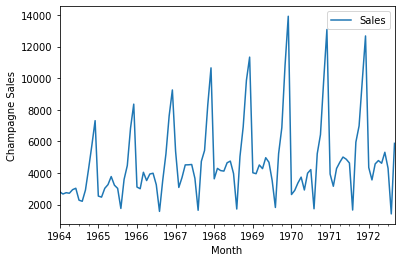

In [228]:
#Plotting the given data
data.plot()
plt.ylabel('Champagne Sales')

ADF TEST

In [229]:
# Ho : data is non-stationary
# H1 : data is stationary


adf_test = adfuller(data['Sales'],autolag = 'AIC')
print(adf_test)
print("1. ADF test:",adf_test[0])
print("2. ADF test p-value:",adf_test[1])
print("3. Number of lags:",adf_test[2])

(-1.8335930563276188, 0.363915771660247, 11, 93, {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}, 1478.4633060594724)
1. ADF test: -1.8335930563276188
2. ADF test p-value: 0.363915771660247
3. Number of lags: 11


Since P-value is greater than 0.05,we failed to reject null hypothesis and conclude that the series is non-stationary.

In [230]:
data['Sales first difference'] = data['Sales'] - data['Sales'].shift(1)
data.head()

,Sales,Sales first difference
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,-143.0
1964-03-01,2755,83.0
1964-04-01,2721,-34.0
1964-05-01,2946,225.0


In [231]:
adf_test1 = adfuller(data['Sales first difference'].dropna(), autolag = 'AIC')
print(adf_test1)
print("1.ADF test:", adf_test1[0])
print("2.ADF test p value:", adf_test1[1])
print("3.Number of lags:", adf_test1[2])

(-7.189896448051, 2.519620447387081e-10, 11, 92, {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}, 1466.8267262915892)
1.ADF test: -7.189896448051
2.ADF test p value: 2.519620447387081e-10
3.Number of lags: 11


After doing the difference, we can see that the p-value is less than significance level and reject null hypothesis. Hence, we conclude that the series is stationary.


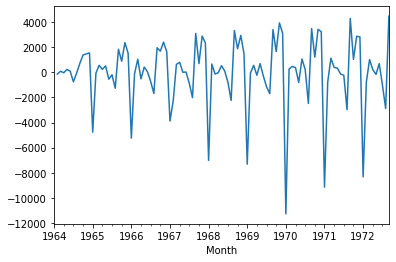

In [232]:
data['Sales first difference'].plot()

In [233]:
data['Seasonal First Difference']=data['Sales']-data['Sales'].shift(12)
data.head()

,Sales,Sales first difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN


In [234]:
adf_test = adfuller(data['Seasonal First Difference'].dropna(), autolag = 'AIC')
print(adf_test)
print("1.ADF test:", adf_test[0])
print("2.ADF test p value:", adf_test[1])
print("3.Number of lags:", adf_test[2])

(-7.626619157213166, 2.0605796968136632e-11, 0, 92, {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}, 1294.7753384560438)
1.ADF test: -7.626619157213166
2.ADF test p value: 2.0605796968136632e-11
3.Number of lags: 0


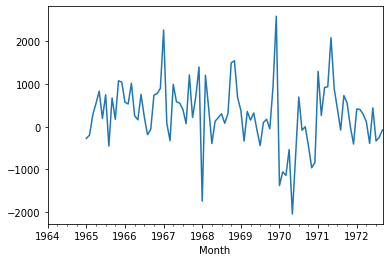

In [235]:
data['Seasonal First Difference'].plot()

ACF AND PACF PLOTS


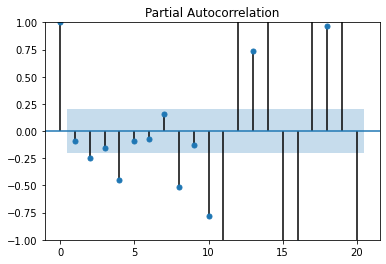

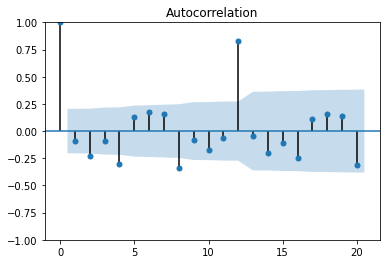

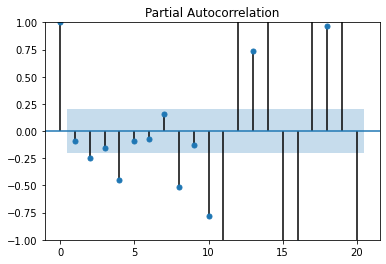

In [236]:
plot_acf(data['Sales first difference'].iloc[13:],lags = 20)
plot_pacf(data['Sales first difference'].iloc[13:],lags = 20)


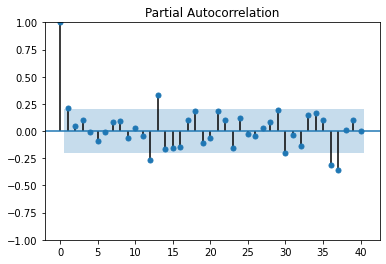

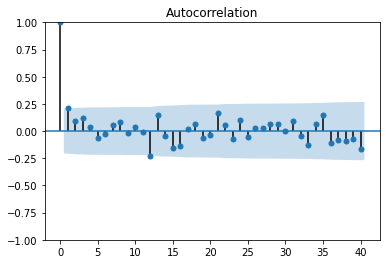

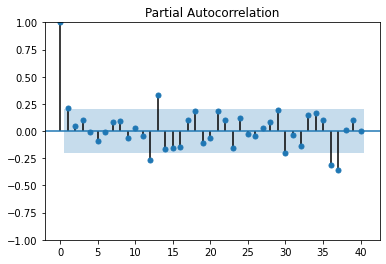

In [237]:
plot_acf(data['Seasonal First Difference'].iloc[13:],lags = 40)
plot_pacf(data['Seasonal First Difference'].iloc[13:],lags = 40)

ARIMA MODEL

In [238]:
model_arima=ARIMA(data['Sales'],order=(1,1,1)).fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 09 May 2022   AIC                           1911.627
Time:                        16:00:49   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.328      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [239]:
data['forecast_arima']=model_arima.predict(start=90,end=105,dynamic=True)

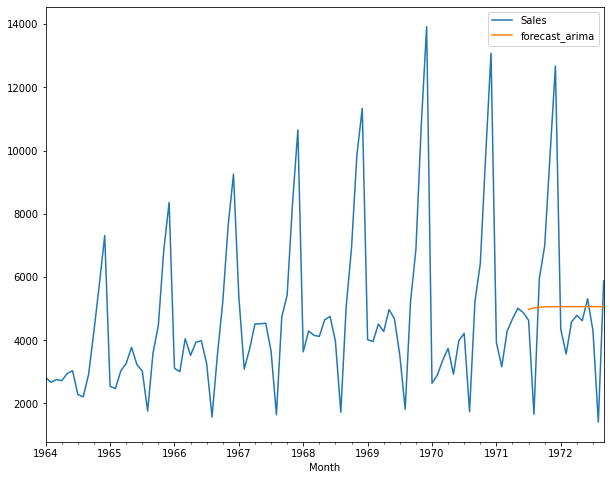

In [240]:
data[['Sales','forecast_arima']].plot(figsize=(10,8))

Seasonal ARIMA model

In [241]:
import statsmodels.api as sm


In [242]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Mon, 09 May 2022   AIC                           1486.804
Time:                                    16:00:51   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

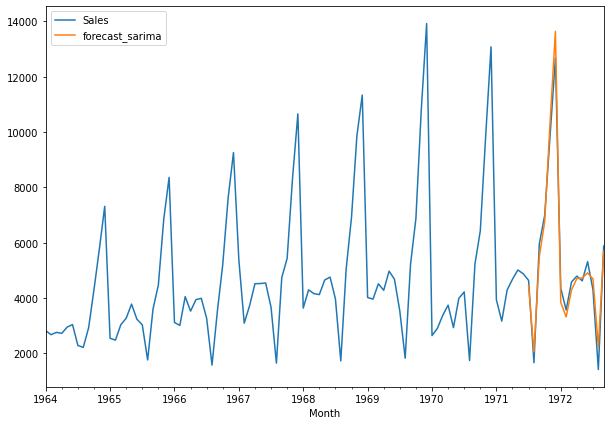

In [243]:
data['forecast_sarima']=model.predict(start=90,end=105,dynamic=True)
data[['Sales','forecast_sarima']].plot(figsize=(10,7))

Forecasting future sales

In [244]:
from pandas.tseries.offsets import DateOffset
new_dates=[data.index[-1]+DateOffset(months=x) for x in range(0,24)]
future_pred =pd.DataFrame(index=new_dates[1:],columns =data.columns)
future_pred.head()

,Sales,Sales first difference,Seasonal First Difference,forecast_arima,forecast_sarima
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN


In [245]:
future_data =pd.concat([data,future_pred])


In [246]:
data.tail()

,Sales,Sales first difference,Seasonal First Difference,forecast_arima,forecast_sarima
Month,,,,,
1972-05-01,4618,-170.0,-392.0,5062.502472,4717.512256
1972-06-01,5312,694.0,438.0,5062.520059,4906.404752
1972-07-01,4298,-1014.0,-335.0,5062.528052,4685.437768
1972-08-01,1413,-2885.0,-246.0,5062.531685,2232.409170
1972-09-01,5877,4464.0,-74.0,5062.533337,5686.558484


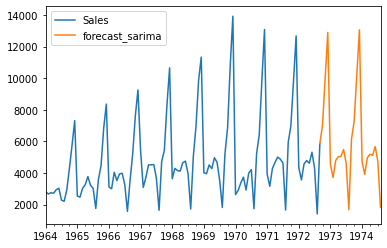

In [247]:
 
future_data['forecast_sarima']=model.predict(start=104,end=130)
future_data[['Sales','forecast_sarima']].plot()